In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import os
from PIL import Image
from ipywidgets import interact, widgets

In [2]:
rail = pd.read_csv('rail.csv', index_col=0)
rail.head()

,left_rail_x1,left_rail_y1,left_rail_x2,left_rail_y2,left_rail_x3,left_rail_y3,left_rail_x4,left_rail_y4,left_rail_x5,left_rail_y5,...,right_rail_x46,right_rail_y46,right_rail_x47,right_rail_y47,right_rail_x48,right_rail_y48,right_rail_x49,right_rail_y49,right_rail_x50,right_rail_y50
rs00000,182,0,142,6,118,12,103,18,93,24,...,282,275,286,281,290,287,295,293,299,299
rs00002,198,0,233,6,252,12,258,18,260,24,...,274,275,274,281,273,287,272,293,272,299
rs00003,140,0,137,6,134,12,131,18,128,24,...,287,275,289,281,293,287,296,293,299,299
rs00004,0,0,28,6,44,12,56,18,64,24,...,284,275,288,281,291,287,295,293,299,299
rs00005,202,0,199,6,194,12,190,18,186,24,...,291,275,294,281,296,287,298,293,299,299


In [3]:
# Step 1: Standardize the data
scaler = StandardScaler()
rail_standardized = scaler.fit_transform(rail)

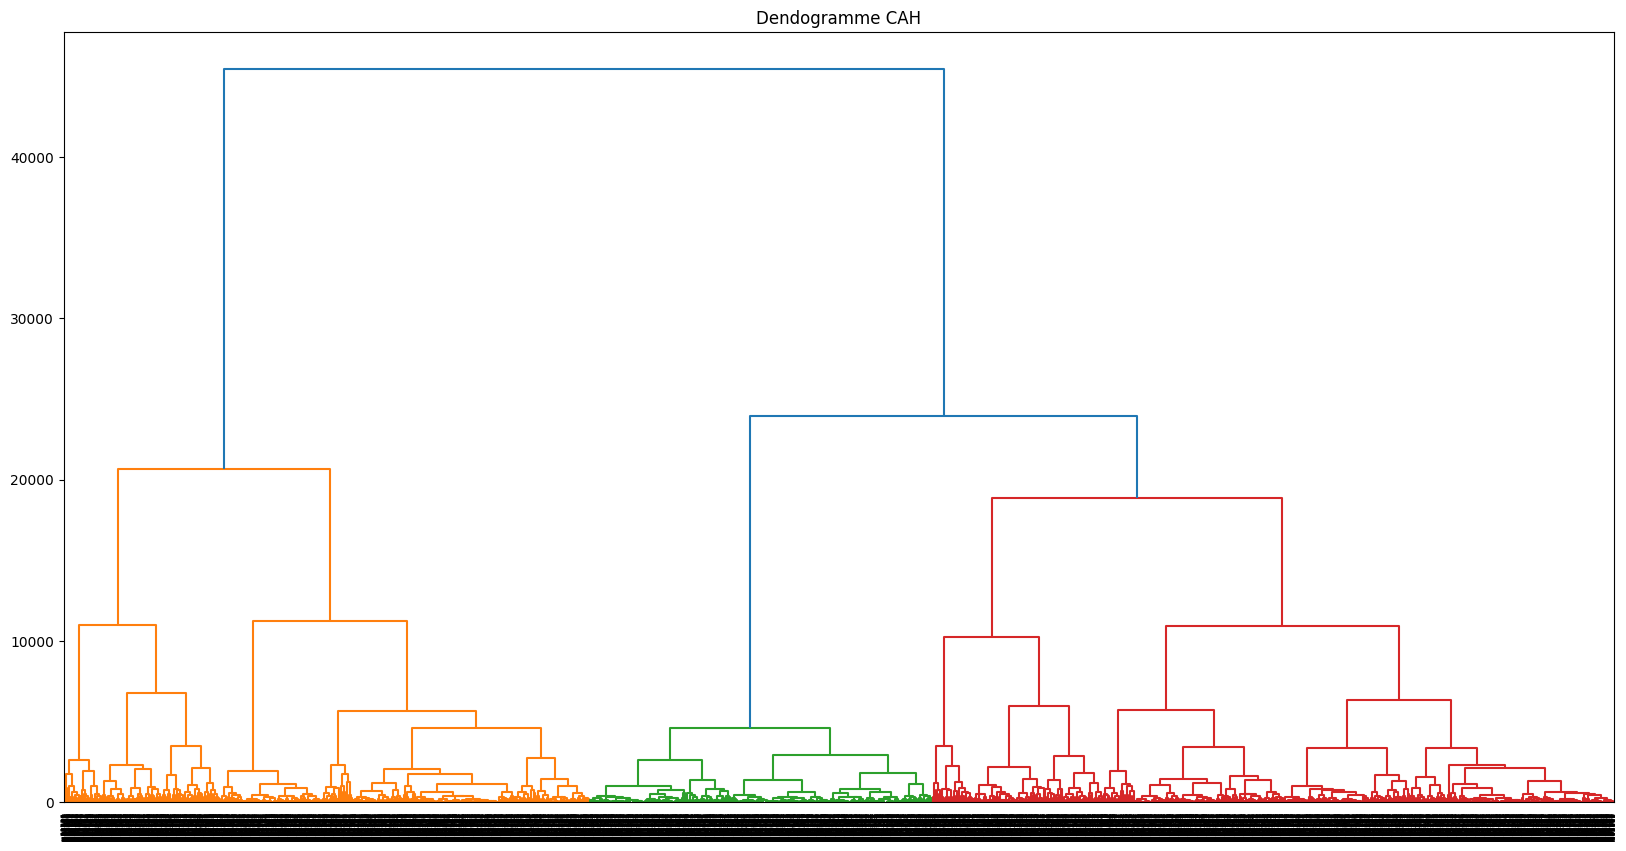

In [3]:
plt.figure(figsize=(20, 10))
plt.title("Dendogramme CAH")
Z = linkage(rail, method = 'ward', metric = 'euclidean')
dendrogram(Z, labels = rail.index, leaf_rotation = 90., color_threshold = 22000)
plt.show()

C:\Users\Dfan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


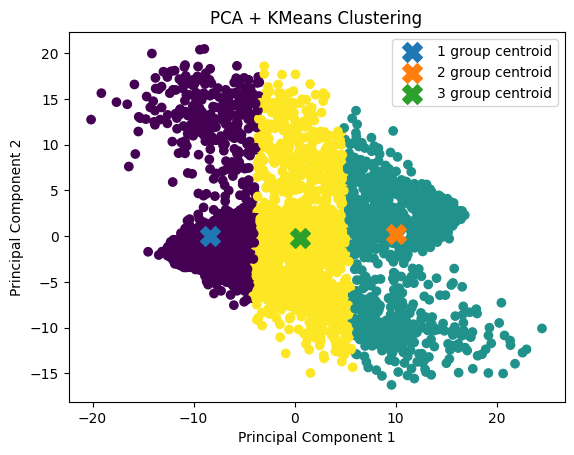

In [3]:
# Step 2: Apply PCA to reduce dimensionality
pca_2 = PCA(n_components=2)  
rail_pca_2 = pca_2.fit_transform(rail_standardized)

# Step 3: Apply KMeans clustering
kmeans_3 = KMeans(n_clusters=3)  
rail['cluster'] = kmeans_3.fit_predict(rail_pca_2)

# Step 4: Visualize the results
plt.scatter(rail_pca_2[:, 0], rail_pca_2[:, 1], c=rail['cluster'], cmap='viridis')
plt.title('PCA + KMeans Clustering')

# Plot centroids
centroids = kmeans_3.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='X', s=200, label=f'{i + 1} group centroid')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [6]:
# Consult the explained variance
explained_variance = pca_2.explained_variance_
explained_variance_ratio = pca_2.explained_variance_ratio_

# Print or use the values as needed
print("Explained Variance:", explained_variance)
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance: [62.31893618 21.30516545]
Explained Variance Ratio: [0.62311065 0.21302474]


In [10]:
import plotly.graph_objects as go

# Step 4: Visualize the results in 3D with plotly
fig = go.Figure()

# Add 3D scatter plot
fig.add_trace(go.Scatter3d(
    x=rail_pca_3[:, 0],
    y=rail_pca_3[:, 1],
    z=rail_pca_3[:, 2],
    mode='markers',
    marker=dict(color=rail['cluster'], colorscale='Viridis', size=5),
    name='Data Points'
))

# Add centroids
for i, centroid in enumerate(centroids):
    fig.add_trace(go.Scatter3d(
        x=[centroid[0]],
        y=[centroid[1]],
        z=[centroid[2]],
        mode='markers',
        marker=dict(color='red', size=10, symbol='cross'),
        name=f'{i + 1} group centroid'
    ))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    title='PCA + KMeans Clustering'
)

fig.show()

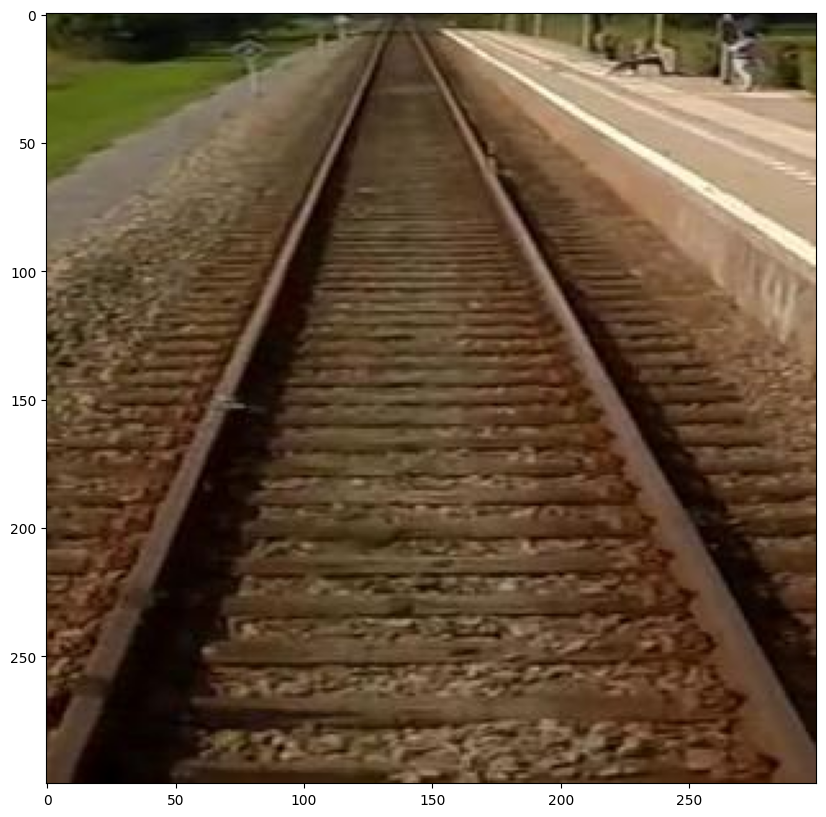

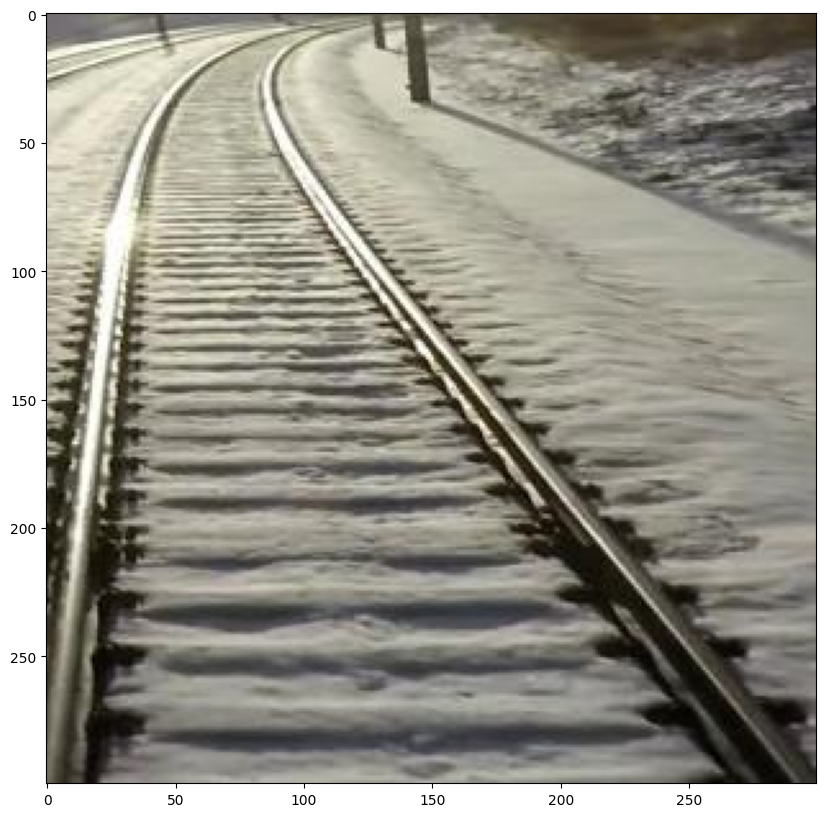

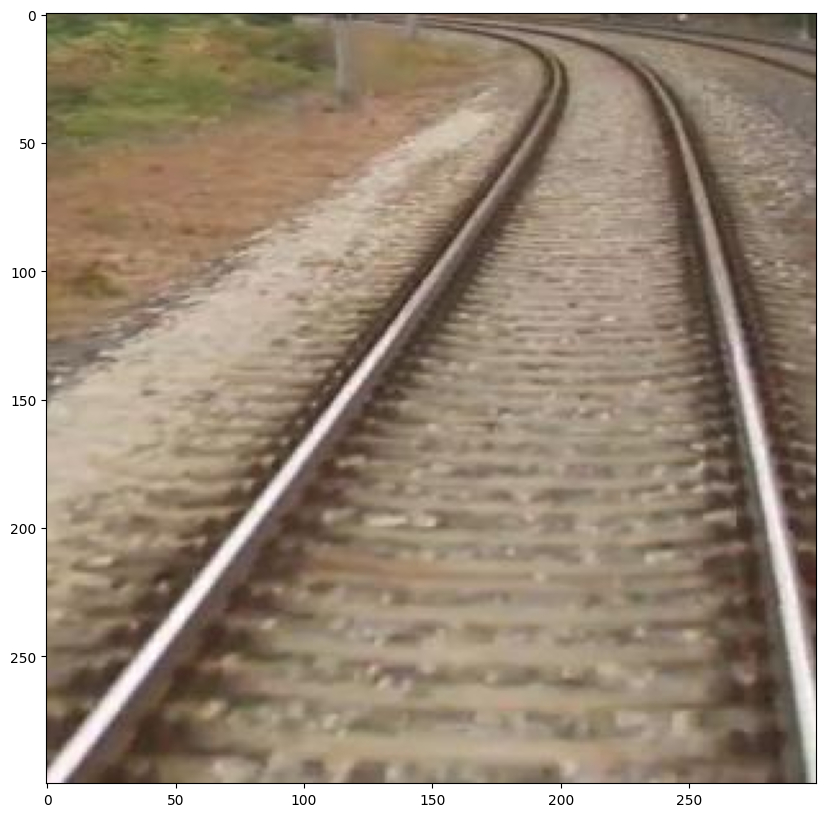

In [6]:
# Reshape the center array outside the loop
centroids_reshaped = centroids.reshape(-1, 2)

for center in centroids_reshaped:
    distances = []
    for i, component_pca in enumerate(rail_pca_2):
        # Calculate the distance
        distance = euclidean_distances(center.reshape(1, -1), component_pca.reshape(1, -1))
        distances.append(distance)

    # Find the index of the minimum value
    min_index = np.argmin(distances)
    # Find the minimum value
    min_value = np.min(distances)

    # Load the image
    image_index = rail.index[min_index]
    image_filename = f'{image_index}.jpg'
    image_path = os.path.join('rs19_val_cropped_resized', image_filename)
    image = Image.open(image_path)
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

In [7]:
# Function to find the index of the closest value in rail_pca
def find_closest_index(array, traget_value):
    idx = np.abs(array - traget_value).argmin()
    return idx

# Function to display the corresponding image
def display_image(idx):
    # Load the image
    image_index = rail.index[idx]
    image_filename = f'{image_index}.jpg'
    image_path = os.path.join('rs19_val_cropped_resized', image_filename)
    image = Image.open(image_path)
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.title(image_filename)
    plt.imshow(image)


In [8]:
# Create an interactive slider with forward and backward buttons
slider = widgets.FloatSlider(value=rail_pca_2[:, 0].min(),
                             min=rail_pca_2[:, 0].min(),
                             max=rail_pca_2[:, 0].max(),
                             step=0.1,
                             description='Select Value:',
                             style={'description_width': 'initial'},  # Ensure full label is visible
                             layout={'width': '70%'})
@interact(target_value=slider,
          step=widgets.FloatText(value=0.1, description='Step:'))
def update_slider(target_value, step):
    closest_index = find_closest_index(rail_pca_2[:, 0], slider.value)  # Use slider value
    display_image(closest_index)

interactive(children=(FloatSlider(value=-20.14536972995579, description='Select Value:', layout=Layout(width='…

C:\Users\Dfan\AppData\Roaming\Python\Python311\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\Dfan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


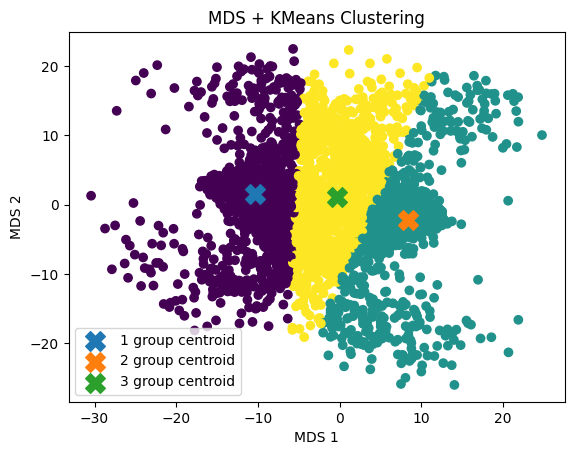

In [7]:
mds = MDS(n_components=2, random_state=1)
rail_mds = mds.fit_transform(rail_standardized)

In [ ]:
kmeans_mds = KMeans(n_clusters=3) 
rail['cluster_mds'] = kmeans_mds.fit_predict(rail_mds)

# Visualize the results
plt.scatter(rail_mds[:, 0], rail_mds[:, 1], c=rail['cluster_mds'], cmap='viridis')
plt.title('MDS + KMeans Clustering')

# Plot centroids
centroids = kmeans_mds.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='X', s=200, label=f'{i + 1} group centroid')

plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.legend()
plt.show()

C:\Users\Dfan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


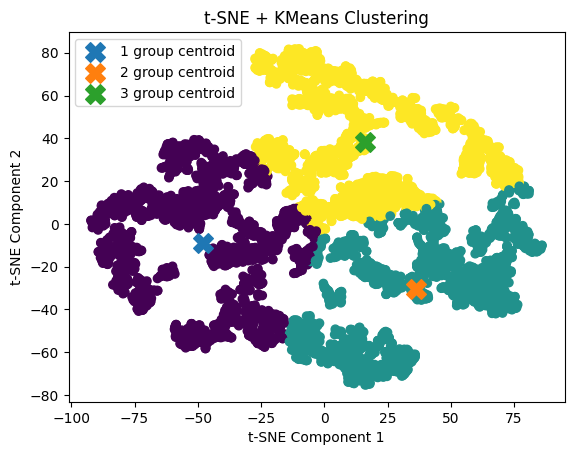

In [4]:
# tsne

# Step 2: Apply t-SNE for dimensionality reduction and visualization
tsne_2 = TSNE(n_components=2)  
rail_tsne_2 = tsne_2.fit_transform(rail_standardized)

# Step 3: Apply KMeans clustering
kmeans_3 = KMeans(n_clusters=3)  
rail['cluster'] = kmeans_3.fit_predict(rail_tsne_2)

# Step 4: Visualize the results
plt.scatter(rail_tsne_2[:, 0], rail_tsne_2[:, 1], c=rail['cluster'], cmap='viridis')
plt.title('t-SNE + KMeans Clustering')

# Plot centroids
centroids = kmeans_3.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='X', s=200, label=f'{i + 1} group centroid')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [7]:
# Step 3: Apply KMeans clustering
tsne_3 = TSNE(n_components=3)  
rail_tsne_3 = tsne_3.fit_transform(rail_standardized)
df = pd.DataFrame(data=rail_tsne_3, columns=["feat1", "feat2", "feat3"])
df.head()

In [9]:
# Creating plot
import plotly.express as px
fig = px.scatter_3d(df, x='feat1', y='feat2', z='feat3')
fig.show()